#              **Speech Emotion Recognition** 

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


Load the dataset

In [2]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')
print (labels[:5])
paths[:5] 
        

Dataset is Loaded
['fear', 'fear', 'fear', 'fear', 'fear']


['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

creating a DataFrame

In [3]:
df=pd.DataFrame()
df['Speech']=paths
df['labels']=labels
df.head()

,Speech,labels
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [4]:
df['labels'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5595    False
5596    False
5597    False
5598    False
5599    False
Name: labels, Length: 5600, dtype: bool

In [5]:
print(df['labels'].dtype)

object


In [6]:
df['labels'].value_counts()

labels
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

**Exploratory Data Analysis**

> Label Enciding

In [7]:
df['labels']

0       fear
1       fear
2       fear
3       fear
4       fear
        ... 
5595      ps
5596      ps
5597      ps
5598      ps
5599      ps
Name: labels, Length: 5600, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['labels_encoded']=label_encoder.fit_transform(df['labels'])
df['labels_encoded']

0       2
1       2
2       2
3       2
4       2
       ..
5595    5
5596    5
5597    5
5598    5
5599    5
Name: labels_encoded, Length: 5600, dtype: int64

<Axes: ylabel='count'>

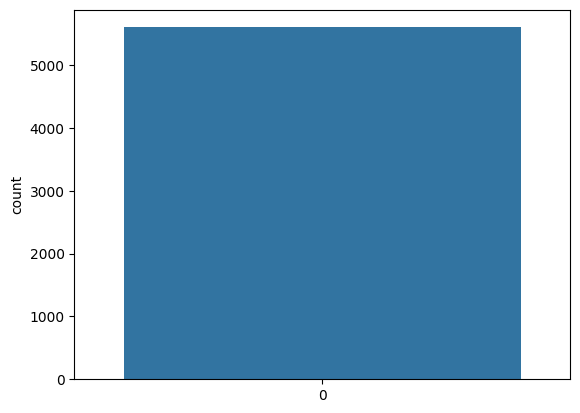

In [9]:
sns.countplot(df['labels_encoded'])

In [10]:
#convert the encoded labels to one-hot vectors
one_hot_encoded=pd.get_dummies(df['labels'])
one_hot_encoded

,angry,disgust,fear,happy,neutral,ps,sad
0,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
5595,False,False,False,False,False,True,False
5596,False,False,False,False,False,True,False
5597,False,False,False,False,False,True,False
5598,False,False,False,False,False,True,False


<Axes: ylabel='count'>

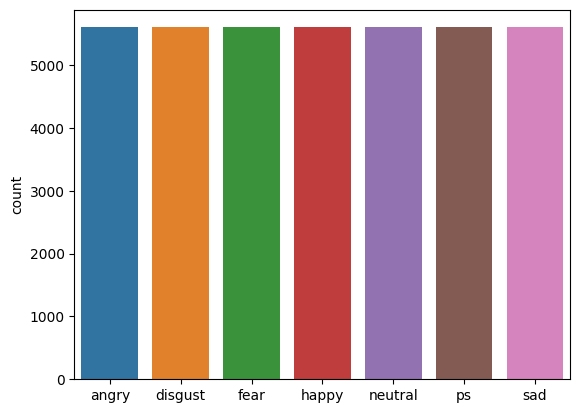

In [11]:
sns.countplot(one_hot_encoded)

In [12]:
df

,Speech,labels,labels_encoded
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear,2
...,...,...,...
5595,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
5596,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
5597,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5
5598,/kaggle/input/toronto-emotional-speech-set-tes...,ps,5


*Wave plot and Spectogram*

In [13]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

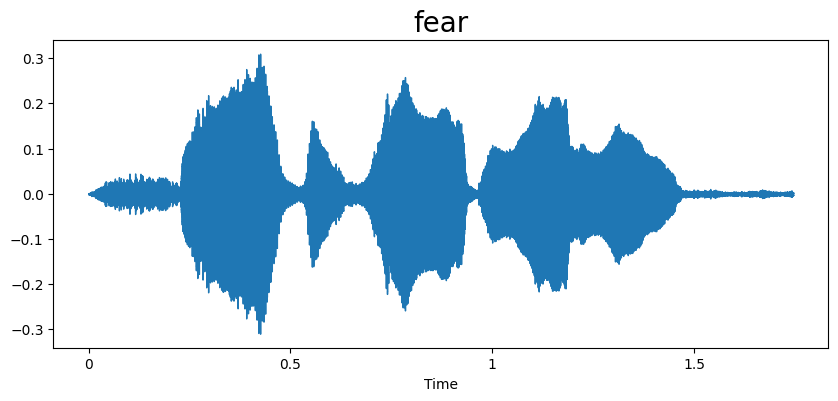

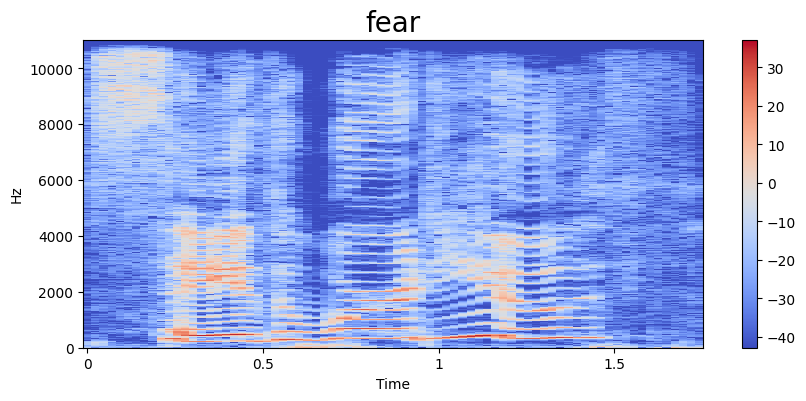

In [14]:
emotion='fear'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

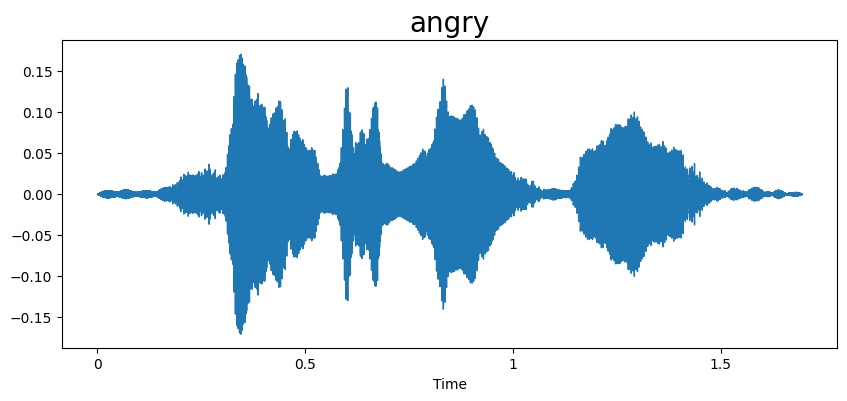

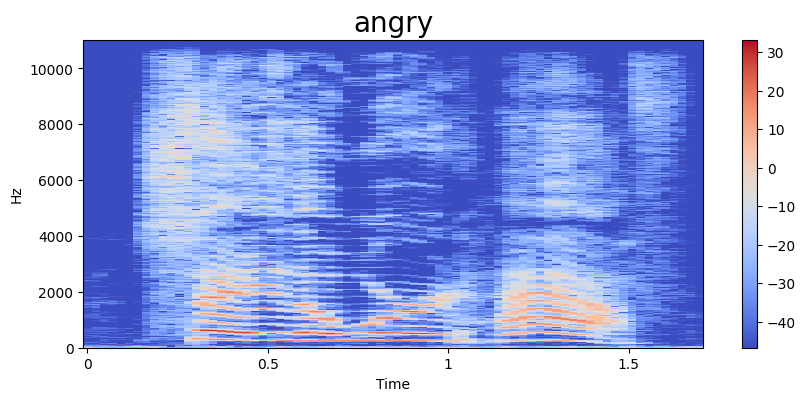

In [15]:
emotion='angry'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

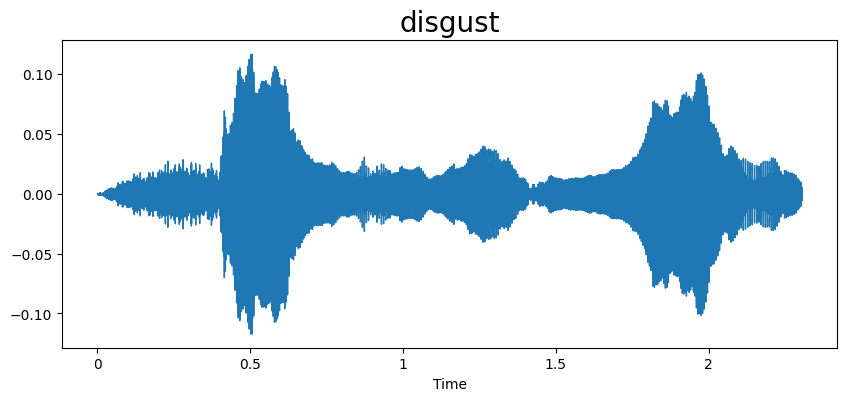

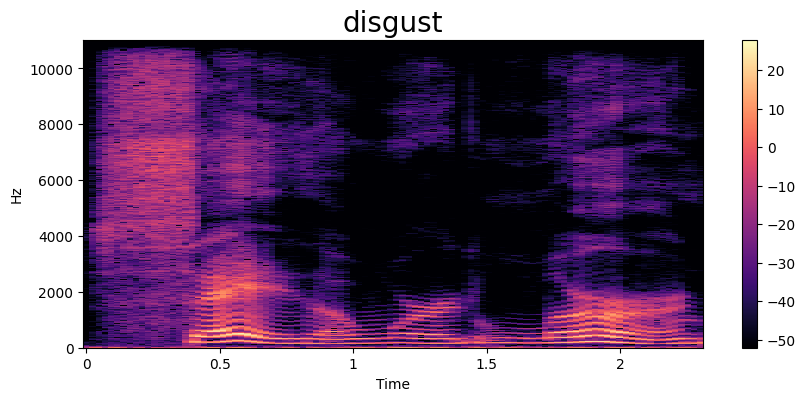

In [16]:
emotion='disgust'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

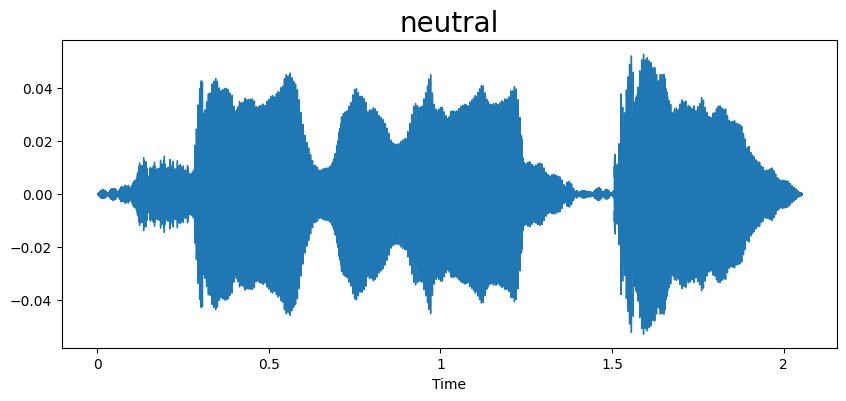

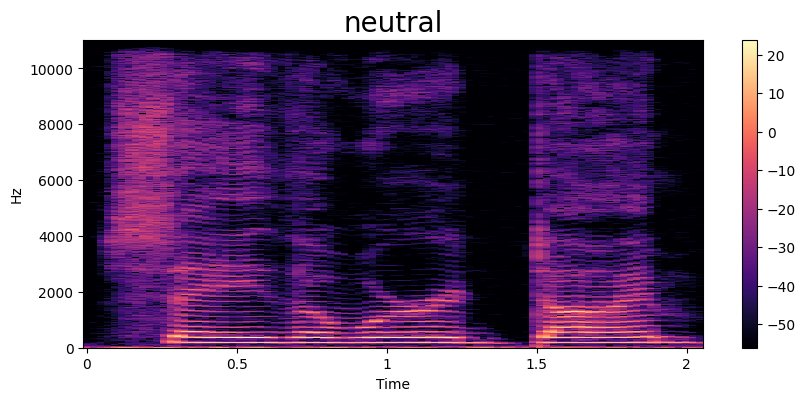

In [17]:
emotion='neutral'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

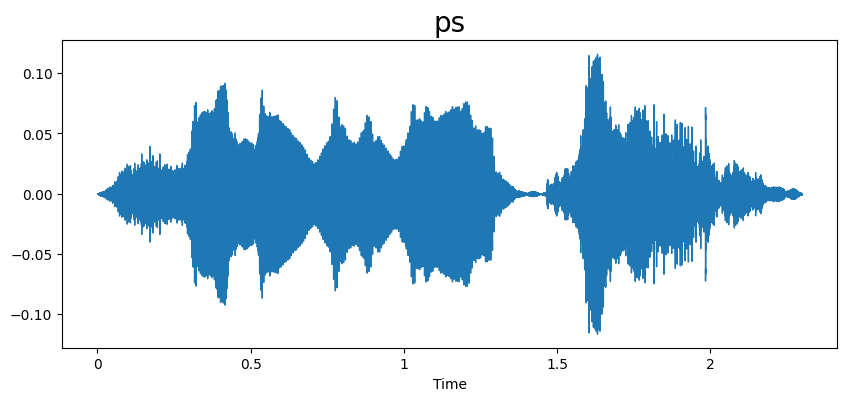

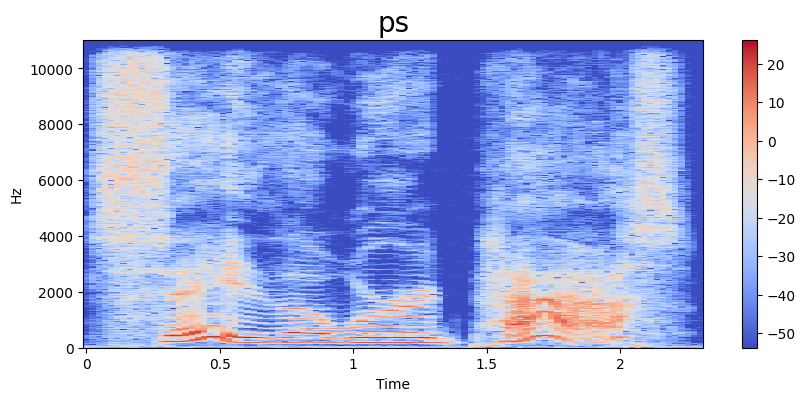

In [18]:
emotion='ps'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

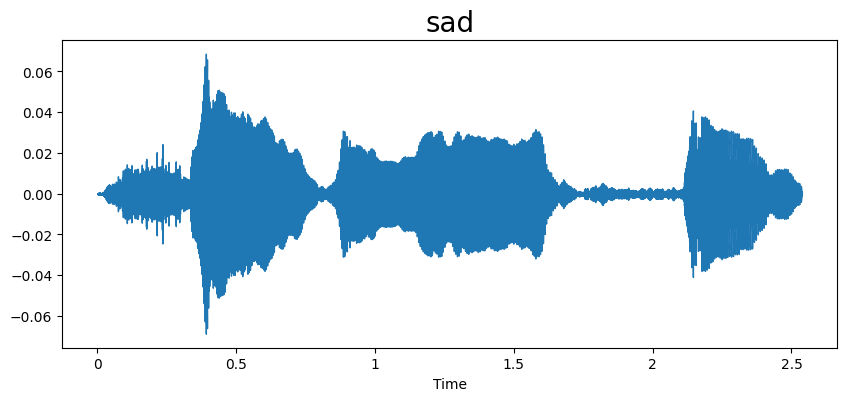

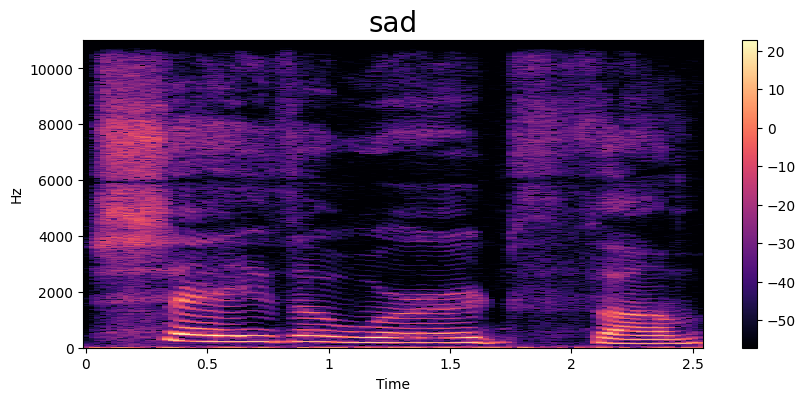

In [19]:
emotion='sad'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

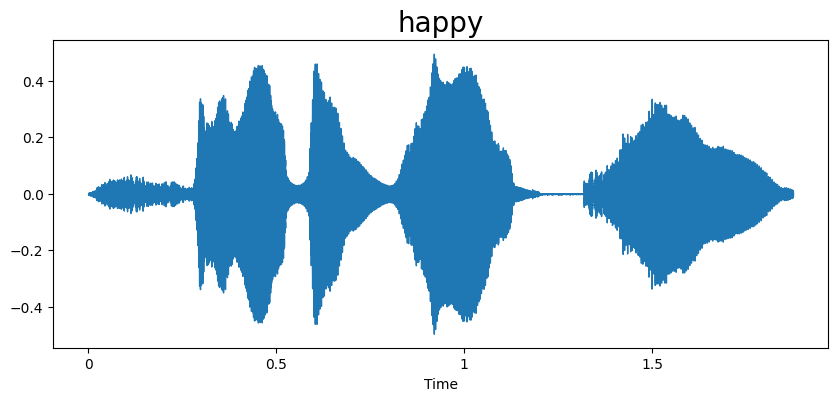

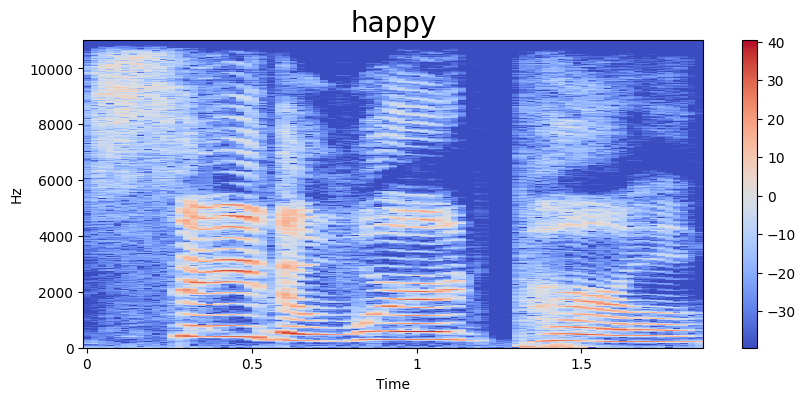

In [20]:
emotion='happy'
path=np.array(df['Speech'][df['labels']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

Feature Extraction

In [21]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [22]:
extract_mfcc(df['Speech'][6])

array([-383.90195  ,   53.061512 ,  -12.882476 ,   12.845002 ,
        -12.257006 ,   -4.379287 ,   -1.9407736,   -6.1182337,
        -18.106682 ,    8.854077 ,  -21.243792 ,    2.4039714,
          1.9022844,   -4.1594296,    5.4572077,   -7.7048745,
         -5.7973638,   14.678223 ,    5.2813506,   21.219189 ,
         22.78579  ,   10.599764 ,    2.6149755,    4.054955 ,
          0.9551013,   14.962216 ,   -2.6833382,    0.5684392,
         -9.09847  ,   -5.728309 ,   -2.4211385,    1.2561877,
        -10.902922 ,   -4.6303086,   -4.990394 ,    2.4980035,
          0.4573392,    3.3309147,    8.213271 ,    5.7722178],
      dtype=float32)

In [23]:
x_mfcc=df['Speech'].apply(lambda x:extract_mfcc(x))

In [24]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689112, 22.125532, ...
1       [-348.34332, 35.193233, -3.841328, 14.658875, ...
2       [-340.11435, 53.796444, -14.267782, 20.884027,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.025059083, 8.431058, ...
5596    [-313.96478, 39.847843, -5.6493053, -3.867575,...
5597    [-357.54886, 77.886055, -15.224756, 2.194633, ...
5598    [-353.1474, 101.68391, -14.175896, -12.037376,...
5599    [-389.4595, 54.042767, 1.346998, -1.4258983, -...
Name: Speech, Length: 5600, dtype: object

In [25]:
X=[x for x in x_mfcc]
X=np.array(X)
X.shape

(5600, 40)

In [26]:
X=np.expand_dims(X,-1)
X.shape

(5600, 40, 1)

In [27]:
from keras.utils import to_categorical
y=to_categorical(df['labels_encoded'])
y.shape

(5600, 7)

In [28]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Create the LSTM Model

In [29]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [30]:
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

Train the model

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 5s 262ms/step - loss: 1.7973 - accuracy: 0.3431 - val_loss: 2.0621 - val_accuracy: 0.1071
Epoch 2/100
9/9 [==============================] - 2s 187ms/step - loss: 1.4856 - accuracy: 0.5156 - val_loss: 2.0022 - val_accuracy: 0.1071
Epoch 3/100
9/9 [==============================] - 2s 185ms/step - loss: 1.1105 - accuracy: 0.6357 - val_loss: 1.8725 - val_accuracy: 0.1134
Epoch 4/100
9/9 [==============================] - 2s 187ms/step - loss: 0.8607 - accuracy: 0.7092 - val_loss: 1.4582 - val_accuracy: 0.3420
Epoch 5/100
9/9 [==============================] - 2s 185ms/step - loss: 0.6737 - accuracy: 0.7725 - val_loss: 1.1254 - val_accuracy: 0.5500
Epoch 6/100
9/9 [==============================] - 2s 208ms/step - loss: 0.5243 - accuracy: 0.8250 - val_loss: 0.9154 - val_accuracy: 0.6438
Epoch 7/100
9/9 [==============================] - 2s 192ms/step - loss: 0.3976 - accuracy: 0.8676 - val_loss: 0.6394 - val_accuracy: 0.7786
Epoch 8/100
9

In [ ]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='Train Accuracy')
plt.plot(epochs,val_acc,label='Val Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
                   

In [ ]:
epochs=list(range(100))
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Train loss')
plt.plot(epochs,val_loss,label='Val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
               